In [1]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [2]:
wic_part_df = pd.read_csv("top_ten_wic.csv")
wic_part_df = wic_part_df.drop("Unnamed: 0", axis = 1)
wic_part_df.head(10)

,State,% of WIC Participants,% of School Lunch Program Participants,% of School Breakfast Program Participants,% of Summer Food Participants,% Adults with Diabetes,% Obese Adults,State Population
0,CA,3.735160,8.594137,3.958088,0.299174,8.774138,24.131034,38335203
1,TX,3.607650,12.520410,6.869920,0.681266,10.396063,28.702756,26473525
2,AK,3.162859,7.201662,2.845407,0.696638,7.103571,31.325000,728929
3,OK,3.077342,11.369284,5.911980,0.293712,13.025974,34.453247,3852415
4,MS,3.064790,13.094010,6.932160,0.900056,14.657317,36.807317,2990482
5,AR,3.034377,11.238083,5.623351,1.417735,13.308000,35.898667,2958663
6,LA,3.022997,12.218177,5.741568,0.884316,12.893750,36.176563,4626402
7,KY,2.952475,12.107574,6.294704,0.458791,13.267500,34.230000,4400477
8,NM,2.942270,10.559550,7.105098,1.073570,9.254545,25.078788,2085193
9,GA,2.899607,12.472466,6.090554,0.716649,12.686792,31.393711,9984938


In [3]:
# # divide by 1,000,000 to make the chart readable
# wic_part_df["State in Decimal"] = wic_part_df["State Population"] / 1000000
# wic_part_df.head()

In [4]:
# top_ten_wic_percent = wic_part_df.sort_values("% of WIC Participants", ascending = False)
# top_ten_wic_percent.head(10)

In [5]:
# top_ten_wic_percent_df = top_ten_wic_percent[wic_part_df.State.isin(['CA', 'TX', 'AK', 'OK', 'MS', 'AR', 'LA', 'KY', 'NM', 'GA'])][["State","% of WIC Participants", "State Population", "State in Decimal"]]
# top_ten_wic_percent_df

In [6]:
# # Set x axis and tick locations
# x_axis = np.arange(len(top_ten_wic_percent_df))
# tick_locations = [value for value in x_axis]

In [7]:
# # Create a list indicating where to write x labels and set figure size to adjust for space
# plt.figure(figsize=(30,15))
# p1 = plt.bar(x_axis, top_ten_wic_percent_df["% of WIC Participants"], color = 'b', alpha = 1, align = "center")
# p2 = plt.bar(x_axis, top_ten_wic_percent_df["State in Decimal"], color = 'g', alpha = 0.5, align = "center")
# plt.xticks(tick_locations, top_ten_wic_percent_df["State"], rotation = "horizontal")
# plt.xlabel("State")
# plt.ylabel("% of WIC Participants vs. Population")
# plt.legend((p1[0], p2[0]), ("% of WIC", "Population"))
# plt.show()

In [8]:
# # Create a list indicating where to write x labels and set figure size to adjust for space
# plt.figure(figsize=(10,5))
# p1 = plt.bar(x_axis, top_ten_wic_percent_df["% of WIC Participants"], color = "green", alpha = 0.5, align = "center")
# plt.xticks(tick_locations, top_ten_wic_percent_df["State"], rotation = "horizontal")
# plt.xlabel("State")
# plt.ylabel("& of WIC Participants")
# plt.ylim(0, 4)
# plt.legend("& of WIC Participants")
# plt.show()

In [9]:
# # Create a list indicating where to write x labels and set figure size to adjust for space
# plt.figure(figsize=(20,10))
# p1 = plt.bar(x_axis, top_ten_wic_percent_df["State in Decimal"], color = "green", alpha = 0.5, align = "center")
# plt.xticks(tick_locations, top_ten_wic_percent_df["State"], rotation = "horizontal")
# plt.xlabel("State")
# plt.ylabel("State in Decimal")
# plt.ylim(0, 40)
# # plt.legend((p1[0], p2[0]), ("WIC Participants", "Population"))
# plt.legend("Population")
# plt.show()

In [40]:
wic = pd.read_csv("all_2013_data.csv")
wic.head(10)

,State,WIC Participants,Nat School Lunch Program Participants,School Breakfast Program Participants,Summer Food Participants,% Adults with Diabetes,% Obese Adults,Population
0,AL,139001,539664,224173,30308,15.489552,36.128358,4829479
1,AK,23055,52495,20741,5078,7.103571,31.325000,728929
2,AZ,182501,646767,289520,23688,11.093333,28.773333,6624617
3,AR,89777,332497,166376,41946,13.308000,35.898667,2958663
4,CA,1431881,3294580,1517341,114689,8.774138,24.131034,38335203
5,CO,96874,375033,155733,17933,6.482812,20.682812,5267603
6,CT,54248,280253,87971,12171,8.475000,25.587500,3596003
7,DE,20797,94571,39522,8190,11.666667,30.500000,925395
8,DC,15674,50569,34873,34778,8.100000,22.400000,649165
9,FL,483565,1638775,750969,145389,12.034328,29.817910,19582022


In [11]:
# divide by 10 to make the charts readable
wic["Population / 10"] = wic["Population"] / 10
wic.head()

,State,WIC Participants,Nat School Lunch Program Participants,School Breakfast Program Participants,Summer Food Participants,% Adults with Diabetes,% Obese Adults,Population,Population / 10
0,AL,139001,539664,224173,30308,15.489552,36.128358,4829479,482947.9
1,AK,23055,52495,20741,5078,7.103571,31.325000,728929,72892.9
2,AZ,182501,646767,289520,23688,11.093333,28.773333,6624617,662461.7
3,AR,89777,332497,166376,41946,13.308000,35.898667,2958663,295866.3
4,CA,1431881,3294580,1517341,114689,8.774138,24.131034,38335203,3833520.3


In [12]:
top_ten_wic = wic.sort_values("WIC Participants", ascending = False)
top_ten_wic.head(10)

,State,WIC Participants,Nat School Lunch Program Participants,School Breakfast Program Participants,Summer Food Participants,% Adults with Diabetes,% Obese Adults,Population,Population / 10
4,CA,1431881,3294580,1517341,114689,8.774138,24.131034,38335203,3833520.3
43,TX,955072,3314594,1818710,180355,10.396063,28.702756,26473525,2647352.5
32,NY,513299,1723748,641178,393066,9.630645,27.524194,19673546,1967354.6
9,FL,483565,1638775,750969,145389,12.034328,29.817910,19582022,1958202.2
10,GA,289524,1245368,608138,71557,12.686792,31.393711,9984938,998493.8
13,IL,280463,1124196,416091,54067,10.505882,29.966667,12879505,1287950.5
33,NC,264755,906460,419976,98255,12.329000,31.513000,9841590,984159.0
35,OH,263683,1063939,422862,60307,12.430682,32.825000,11570022,1157002.2
22,MI,254126,874098,381516,76198,11.371084,32.081928,9898982,989898.2
38,PA,253258,1066255,345082,96893,11.282090,31.446269,12781338,1278133.8


In [13]:
top_ten_wic_df = top_ten_wic[wic_part_df.State.isin(['CA', 'TX', 'AK', 'OK', 'MS', 'AR', 'LA', 'KY', 'NM', 'GA'])][["State","WIC Participants", "Population", "Population / 10"]]
top_ten_wic_df

C:\Users\ohyon\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,State,WIC Participants,Population,Population / 10
4,CA,1431881,38335203,3833520.3
9,FL,483565,19582022,1958202.2
2,AZ,182501,6624617,662461.7
0,AL,139001,4829479,482947.9
5,CO,96874,5267603,526760.3
3,AR,89777,2958663,295866.3
6,CT,54248,3596003,359600.3
1,AK,23055,728929,72892.9
7,DE,20797,925395,92539.5
8,DC,15674,649165,64916.5


In [15]:
# Set x axis and tick locations
x_axis = np.arange(len(top_ten_wic_df))
tick_locations = [value for value in x_axis]

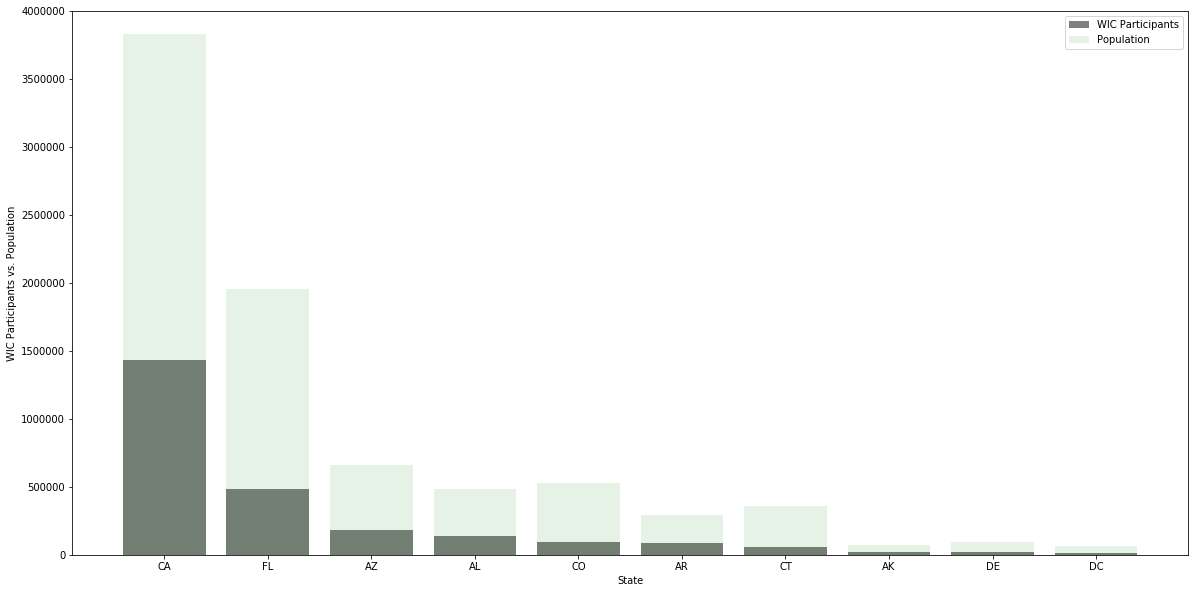

<Figure size 432x288 with 0 Axes>

In [31]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
p1 = plt.bar(x_axis, top_ten_wic_df["WIC Participants"], color = "black", alpha = 0.5, align = "center")
p2 = plt.bar(x_axis, top_ten_wic_df["Population / 10"], color = "green", alpha = 0.1, align = "center")
plt.xticks(tick_locations, top_ten_wic_df["State"], rotation = "horizontal")
plt.xlabel("State")
plt.ylabel("WIC Participants vs. Population")
plt.ylim(0, 4000000)
plt.legend((p1[0], p2[0]), ("WIC Participants", "Population"))
plt.show()
plt.savefig("Wic_Participants_vs_Population_H.png")

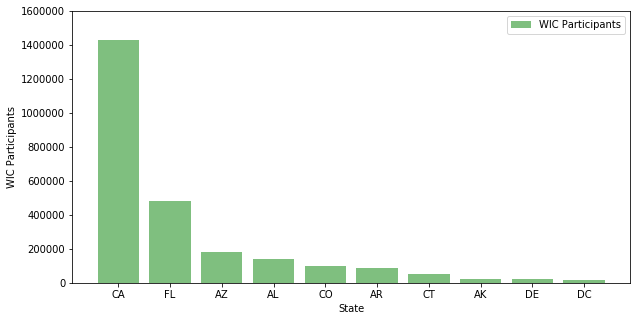

<Figure size 432x288 with 0 Axes>

In [32]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
p1 = plt.bar(x_axis, top_ten_wic_df["WIC Participants"], color = "green", alpha = 0.5, align = "center")
plt.xticks(tick_locations, top_ten_wic_df["State"], rotation = "horizontal")
plt.xlabel("State")
plt.ylabel("WIC Participants")
plt.ylim(0, 1600000)
plt.legend(("WIC Participants", ))
plt.show()
plt.savefig("Wic_Participants_H.png")

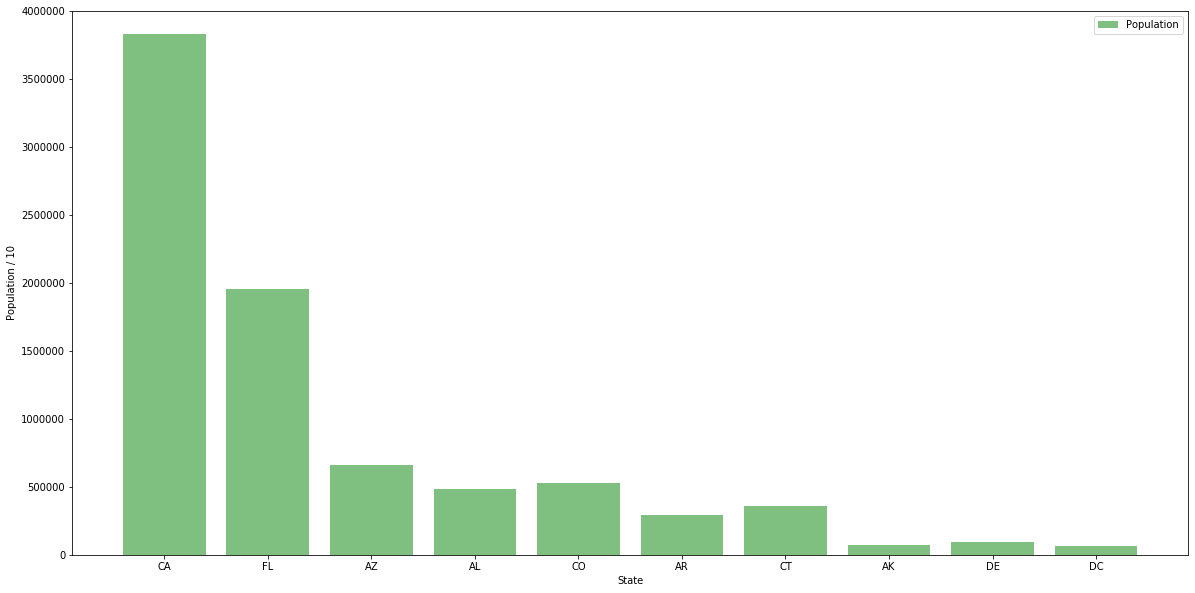

<Figure size 432x288 with 0 Axes>

In [37]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
# p1 = plt.bar(x_axis, top_ten_wic_df["Population / 10"], color = "green", alpha = 0.5, align = "center")
plt.bar(x_axis, top_ten_wic_df["Population / 10"], color = "green", alpha = 0.5, align = "center")
plt.xticks(tick_locations, top_ten_wic_df["State"], rotation = "horizontal")
plt.xlabel("State")
plt.ylabel("Population / 10")
plt.ylim(0, 4000000)
plt.legend(("Population", ))
plt.show()
plt.savefig("Population_H.png")